In [8]:
%run plot_analysis.ipynb
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [10]:
indices = np.random.randint(70000,size=5000)
mnist_5000_data = mnist.data[indices]
mnist_5000_target = mnist.target[indices]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.7)

In [15]:
kernel_fn = ['linear', 'poly', 'rbf', 'sigmoid']

for fn in kernel_fn:
    svm = SVC(kernel=fn)

    svm.fit(x_train, y_train)

    print(fn, svm.score(x_test, y_test))

linear 0.908
poly 0.9086666666666666
rbf 0.944
sigmoid 0.8513333333333334


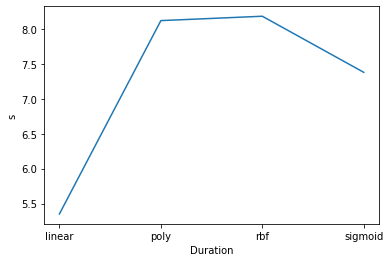

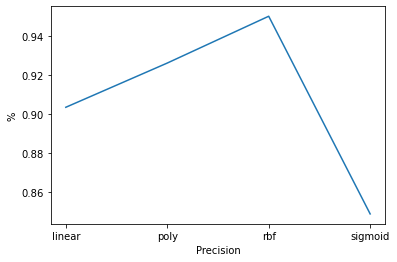

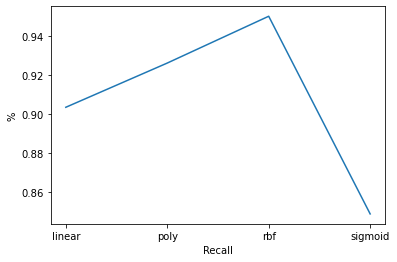

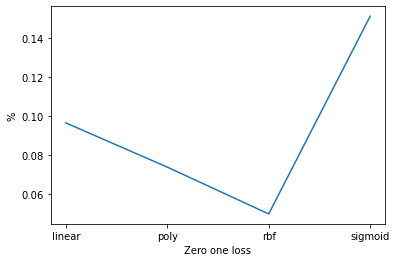

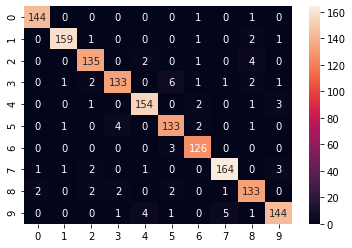

In [16]:
kernel_fn = ['linear', 'poly', 'rbf', 'sigmoid']
label = []
duration = []
expected = []
actual = []

for fn in kernel_fn:
    start_time = time.time()
    svm = SVC(kernel=fn)
    svm.fit(x_train, y_train)
    actual.append(svm.predict(x_test))
    expected.append(y_test)
    duration.append(time.time() - start_time)
    label.append(fn)

plot_analysis(label, duration, expected, actual)

Text(0, 0.5, 'Error rate (%)')

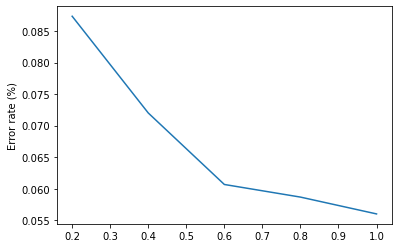

In [50]:
param_c = [0.2, 0.4, 0.6, 0.8, 1]

x = []
y = []

for c in param_c:
    svm = SVC(kernel='rbf', C=c)

    svm.fit(x_train, y_train)

    y.append(1 - svm.score(x_test, y_test))
    x.append(c)
    

plt.plot(x, y)
plt.ylabel('Error rate (%)')

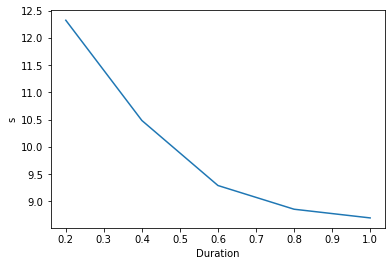

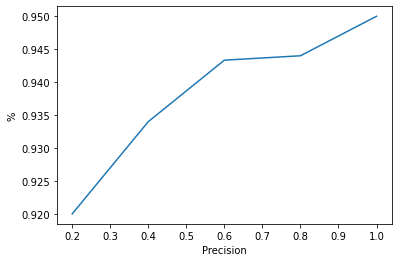

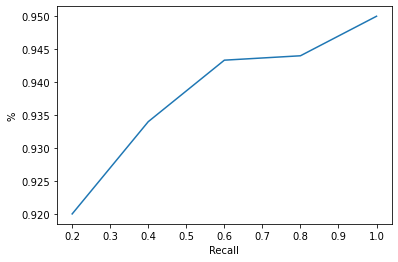

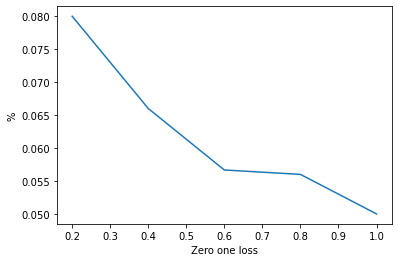

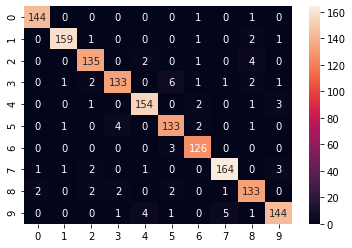

In [17]:
param_c = [0.2, 0.4, 0.6, 0.8, 1]

label = []
duration = []
expected = []
actual = []

for c in param_c:
    start_time = time.time()
    svm = SVC(kernel='rbf', C=c)
    svm.fit(x_train, y_train)
    actual.append(svm.predict(x_test))
    expected.append(y_test)
    duration.append(time.time() - start_time)
    label.append(c)

plot_analysis(label, duration, expected, actual)

Text(0, 0.5, 'Error rate (%)')

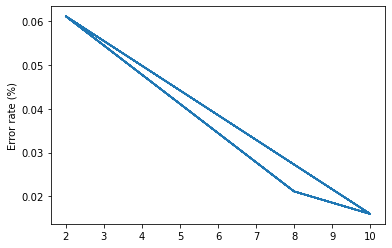

In [54]:
param_c = [0.2, 0.8, 1] * 10

x = []
y = []

for c in param_c:
    svm = SVC(kernel='rbf', C=c)

    svm.fit(x_train, y_train)

    y.append(1 - svm.score(x_train, y_train))
    x.append(c * 10)
    

plt.plot(x, y)
plt.ylabel('Error rate (%)')

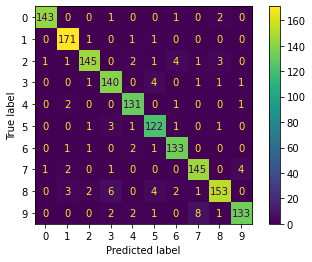

In [29]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

disp.plot()

In [82]:
kernel_fn = ['linear', 'poly', 'rbf', 'sigmoid']
param_c = [0.2, 0.4, 0.6, 0.8, 1]

temps = []
scores = []
precision = []
for fn in kernel_fn:
    temps_c = []
    scores_c = []
    precision_c = []
    for c in param_c:
        svm = SVC(kernel=fn, C=c)
        
        start = time.time()
        svm.fit(x_train, y_train)
        end = time.time()
        
        y_pred = svm.predict(x_test)
        
        temps_c.append(end-start)
        scores_c.append(svm.score(x_test, y_test))
        precision_c.append(precision_score(y_test, y_pred, average='micro'))
    
    temps.append(temps_c)
    scores.append(scores_c)
    precision.append(precision_c)

In [55]:
print(param_c)
np.matrix(temps)

[0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1, 0.2, 0.8, 1]


matrix([[0.50111318, 0.50811982, 0.51430392, 0.50661993, 0.50492978],
        [1.29291797, 1.04932332, 0.95191646, 0.88866997, 0.83930492],
        [1.35886598, 1.07683849, 0.970474  , 0.90959311, 0.88733387],
        [1.48378897, 1.14681506, 1.0075345 , 0.91603732, 0.84979057]])

In [ ]:
tridi = plt.figure()
ax = tridi.add_subplot(projection='3d')
ax.plot_surface(kernel_fn, param_c, np.matrix(temps))

Text(0.5, 1.0, 'score')

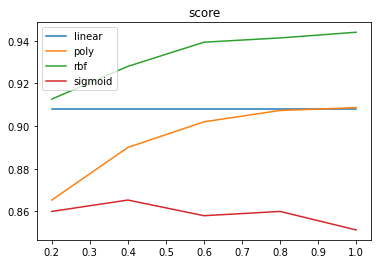

In [77]:
plt.plot(param_c, scores[0])
plt.plot(param_c, scores[1])
plt.plot(param_c, scores[2])
plt.plot(param_c, scores[3])
plt.legend(kernel_fn)
plt.title('score')

Text(0.5, 1.0, 'execution time')

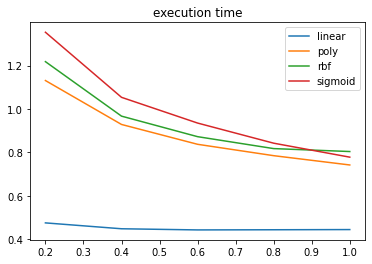

In [78]:
plt.plot(param_c, temps[0])
plt.plot(param_c, temps[1])
plt.plot(param_c, temps[2])
plt.plot(param_c, temps[3])
plt.legend(kernel_fn)
plt.title('execution time')

Text(0.5, 1.0, 'precision')

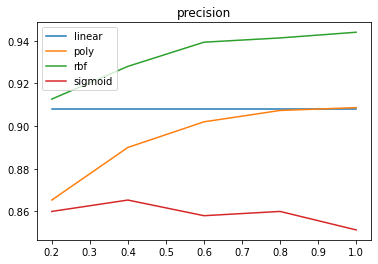

In [83]:
plt.plot(param_c, precision[0])
plt.plot(param_c, precision[1])
plt.plot(param_c, precision[2])
plt.plot(param_c, precision[3])
plt.legend(kernel_fn)
plt.title('precision')